# Network Analysis Lab

Complete the following exercises to help solidify your understanding of network analysis.

In [1]:
import networkx as nx
# import nxviz
# import community
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## U.S. Mens Basketball Data Set

In the `us_mens_basketball.csv` data set, each row represents an single basketball player's participation in a single event at a single Olympics. 

In [2]:
basketball = pd.read_csv('../data/us_mens_basketball.csv')

In [3]:
basketball.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,351,Julius Shareef Abdur-Rahim,M,23.0,202.0,104.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
1,2636,"Stephen Todd ""Steve"" Alford",M,19.0,185.0,74.0,United States,USA,1984 Summer,1984,Summer,Los Angeles,Basketball,Basketball Men's Basketball,Gold
2,2863,Walter Ray Allen,M,25.0,192.0,93.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
3,3874,"William Lloyd ""Willie"" Anderson, Jr.",M,21.0,200.0,86.0,United States,USA,1988 Summer,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Bronze
4,4505,Carmelo Kyan Anthony,M,20.0,203.0,109.0,United States,USA,2004 Summer,2004,Summer,Athina,Basketball,Basketball Men's Basketball,Bronze


## 1. Transform this data set into one that can be turned into a graph where the entities are represented by the Name field and the relationships are represented by whether the players played in the same Olympics together (Games field).

Sort descending by the number of pairwise interactions. Which pair of players have competed in the most Olympics together?

In [4]:
# subset to 'Name' and 'Games' as a groupby? 
# bball_games = basketball.groupby('Games')[['Name', 'Games']].
# bball_games.head()

In [5]:
def df_to_graph(df, entity, edge):
    '''This function creates pairwise relationships from data sets where rows represent entities. It creates a copy of the data set and then leverages the Pandas merge method to join the two copies together via whatever categorical column or list of columns selected to define the edges of the network'''
    df2 = df.copy()
    graph_df = pd.merge(df, df2, how='inner', on=edge)
    graph_df = graph_df.groupby([entity + '_x', entity + '_y']).count().reset_index()
    graph_df = graph_df[graph_df[entity + '_x'] != graph_df[entity + '_y']] # where the name is not equal to itself
    
    if type(edge) == list:
        graph_df = graph_df[[entity + '_x', entity + '_y'] + edge]
    else:
        graph_df = graph_df[[entity + '_x', entity + '_y', edge]]
    
    return graph_df

In [6]:
bball = df_to_graph(basketball, 'Name', 'Games').sort_values(by = 'Games', ascending = False)
bball

,Name_x,Name_y,Games
1557,LeBron Raymone James,Carmelo Kyan Anthony,3
282,Carmelo Kyan Anthony,LeBron Raymone James,3
1347,Karl Malone,Charles Wade Barkley,2
1487,Kobe Bean Bryant,LeBron Raymone James,2
429,"Christopher Paul ""Chris"" Mullin",Michael Jeffrey Jordan,2
...,...,...,...
905,Hakeem Abdul Olajuwon,"Reginald Wayne ""Reggie"" Miller",1
906,Hakeem Abdul Olajuwon,Scottie Maurice Pippen,1
907,Hakeem Abdul Olajuwon,Shaquille Rashuan O'Neal,1
908,Harrison Bryce Jordan Barnes,Carmelo Kyan Anthony,1


## 2. Use the `from_pandas_edgelist` method to turn the data frame into a graph.

/Users/sampoad/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


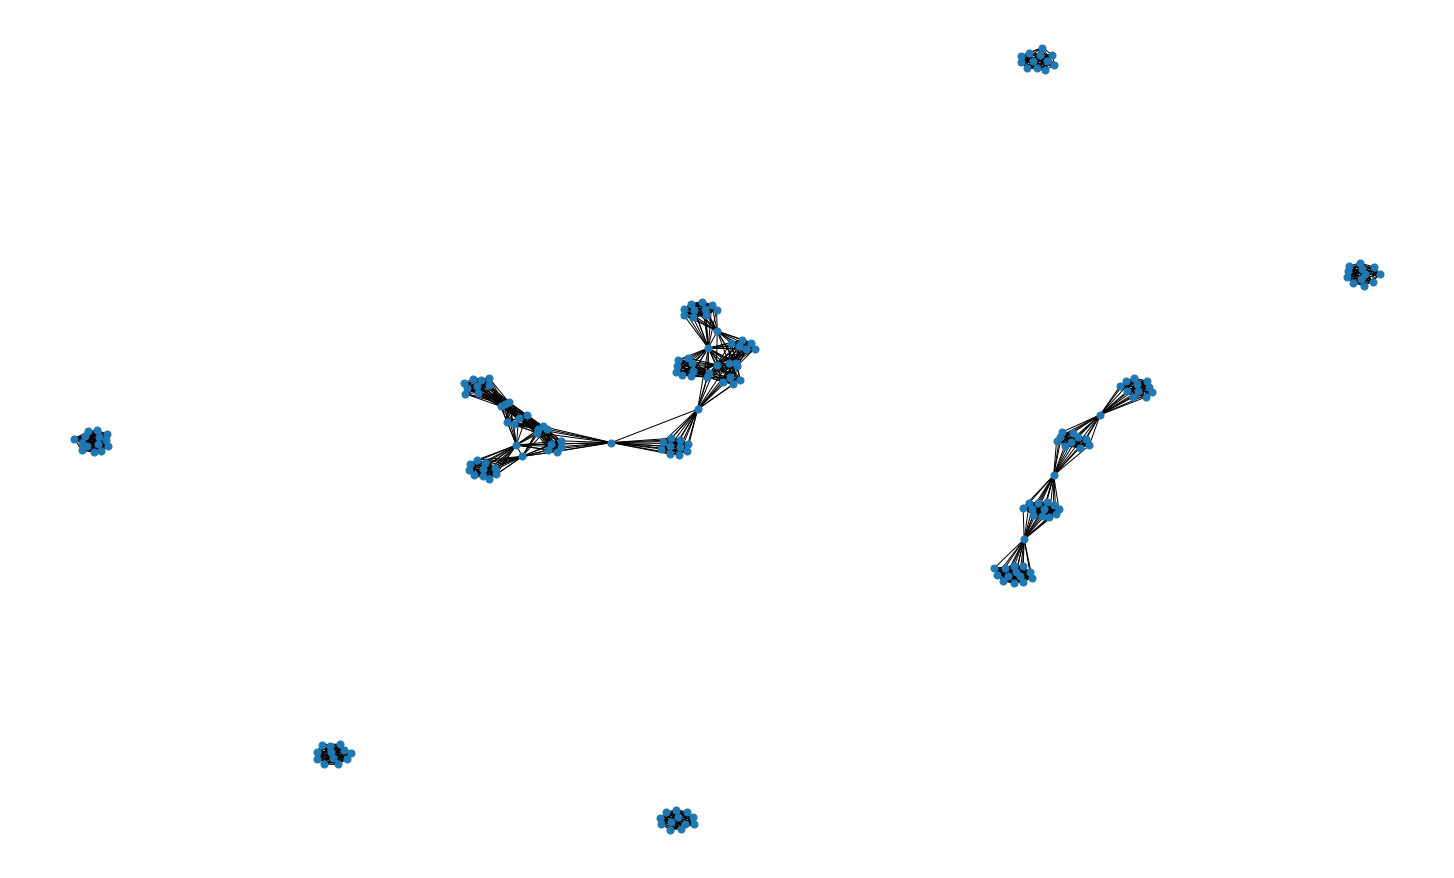

In [7]:
# using nx.Graph()
# bball['Games'].dtype returns int64

G = nx.from_pandas_edgelist(
    bball, # dataframe
    'Name_x', # source (one node)
    'Name_y', # target (next node)
)

plt.figure(figsize=(20,12)) # adjust my figure to be larger

nx.draw(
    G, # my data from above
    node_size = 50,
)

## 3. Compute and print the following graph statistics for the graph:

- Number of nodes
- Number of edges
- Average degree
- Density

In [8]:
print("The number of nodes is " + str(G.order()))
print("The number of edges is " + str(G.size()))

print("The average degree of the nodes is " + str(round(sum(dict(G.degree()).values()) / G.order(), 2)))

print("The density of this graph analysis is " + str(round(nx.density(G), 2))) # calculated by dividing the average degree (computed above) by the number of nodes in the graph

The number of nodes is 196
The number of edges is 1232
The average degree of the nodes is 12.57
The density of this graph analysis is 0.06


## 4. Compute betweenness centrality for the graph and print the top 5 nodes with the highest centrality.

In [9]:
import operator
nx.betweenness_centrality(G)

most_between = sorted(nx.betweenness_centrality(G).items(), key = operator.itemgetter(1), reverse = True)

most_between[:5]

[('Gary Dwayne Payton', 0.09193761564895586),
 ('Jason Frederick Kidd', 0.09135606661379858),
 ('Carmelo Kyan Anthony', 0.04742268041237114),
 ('David Maurice Robinson', 0.03266190853819725),
 ('William Marion "Bill" Hougland', 0.030240549828178694)]

## 5. Compute Eigenvector centrality for the graph and print the top 5 nodes with the highest centrality.

In [10]:
most_eigenlike = sorted(nx.eigenvector_centrality_numpy(G).items(), key = operator.itemgetter(1), reverse = True)

most_eigenlike[:5]

[('Carmelo Kyan Anthony', 0.34185005667190693),
 ('LeBron Raymone James', 0.28845352143158864),
 ('Christopher Emmanuel "Chris" Paul', 0.2243168155853125),
 ('Deron Michael Williams', 0.22431681558531247),
 ('Kobe Bean Bryant', 0.22431681558531244)]

## 6. Compute degree centrality for the graph and print the top 5 nodes with the highest centrality.

In [11]:
most_degree_centrality = sorted(nx.degree_centrality(G).items(), key = operator.itemgetter(1), reverse = True)

most_between[:5]

[('Gary Dwayne Payton', 0.09193761564895586),
 ('Jason Frederick Kidd', 0.09135606661379858),
 ('Carmelo Kyan Anthony', 0.04742268041237114),
 ('David Maurice Robinson', 0.03266190853819725),
 ('William Marion "Bill" Hougland', 0.030240549828178694)]

## 7. Generate a network visualization for the entire graph using a Kamada-Kawai force-directed layout.

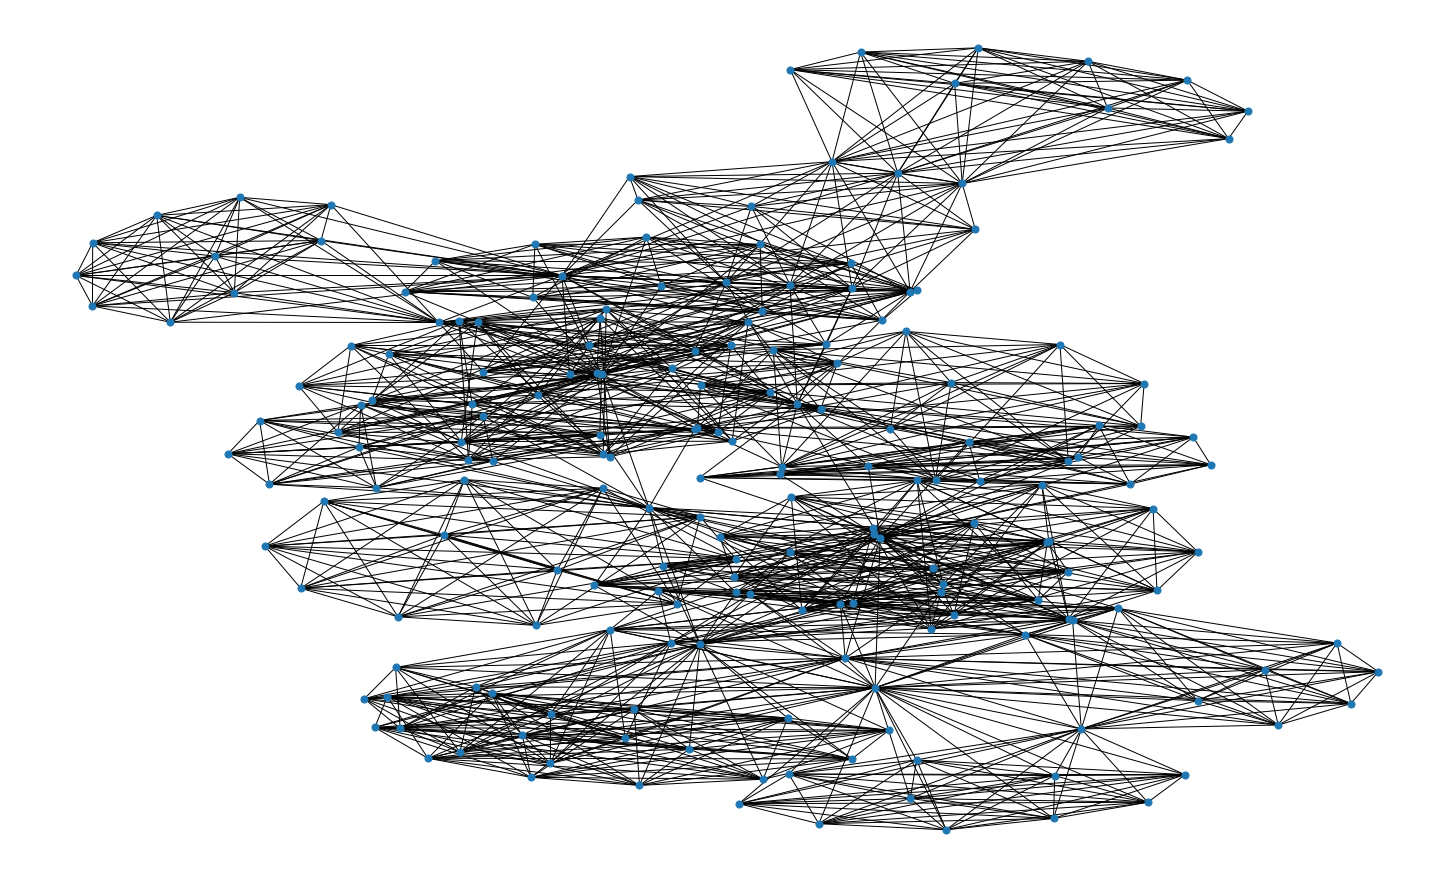

In [12]:
plt.figure(figsize=(20,12)) # adjust my figure to be larger

nx.draw_kamada_kawai(
    G, # my data from above
    node_size = 50,
)

## 8. Create and visualize an ego graph for the player with the highest betweenness centrality.

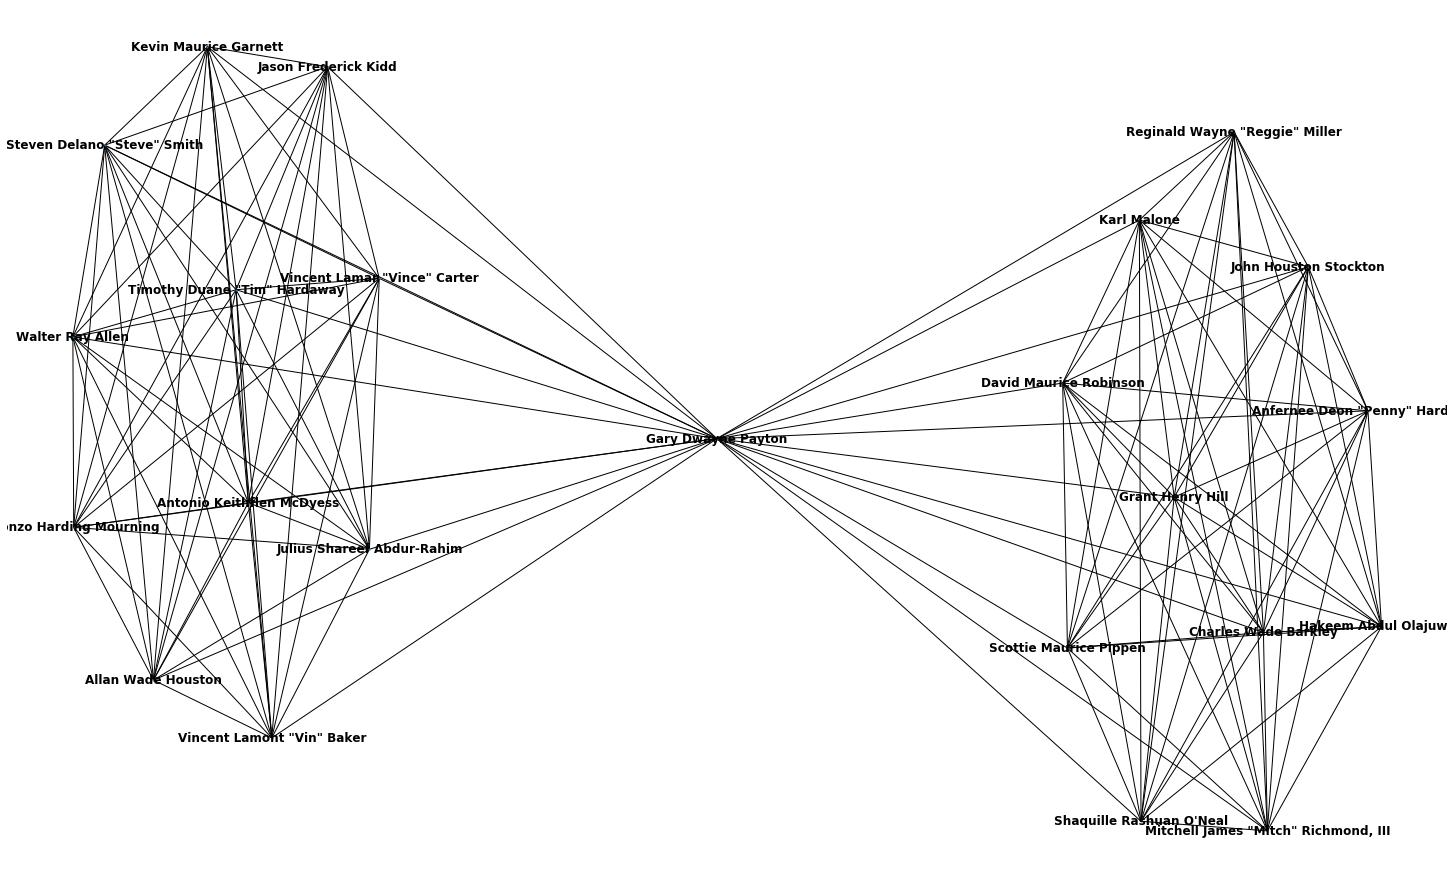

In [20]:
ego = nx.ego_graph(
    G,
    most_between[0][0],
    radius=1, # maximum one degree of separation allowed
)

plt.figure(figsize = (20, 12))

nx.draw(
    ego,
    node_size = 1,
    with_labels = True,
    font_weight = 'bold',
)

## 9. Identify the communities within the entire graph and produce another visualization of it with the nodes color-coded by the community they belong to.

In [14]:
# skipped due to deprecation of library: communities

## Bonus: Hierarchical Graphs

Thus far, we have analyzed graphs where the nodes represented individual players and the edges represented Olympic games that they have competed in together. We can analyze the data at a higher level if we wanted to, strippping out the players as entities and analyzing the data at the Games level. To do this, we would need to reconstruct the graph so that the *Games* field represents the entities and then use the player names as the edge criteria so that there would be an edge between two Olympic games if an player played in both of them. You already have the tools in your toolbox to be able to do this, so give it a try. 

### Create a graph with Games as the entities and then print out the graph statistics.

In [15]:
bball_bonus = df_to_graph(basketball, 'Games', 'Name')
bball_bonus

,Games_x,Games_y,Name
2,1948 Summer,1952 Summer,1
3,1952 Summer,1948 Summer,1
5,1952 Summer,1956 Summer,1
6,1956 Summer,1952 Summer,1
8,1956 Summer,1960 Summer,1
9,1960 Summer,1956 Summer,1
16,1984 Summer,1992 Summer,3
18,1988 Summer,1992 Summer,1
19,1988 Summer,1996 Summer,2
20,1992 Summer,1984 Summer,3


In [16]:
G2 = nx.from_pandas_edgelist(
    bball_bonus, # dataframe
    'Games_x', # source (one node)
    'Games_y', # target (next node)
)

print("The number of nodes is " + str(G2.order()))
print("The number of edges is " + str(G2.size()))

print("The average degree of the nodes is " + str(round(sum(dict(G2.degree()).values()) / G2.order(), 2)))

print("The density of this graph analysis is " + str(round(nx.density(G2), 2)))

The number of nodes is 13
The number of edges is 15
The average degree of the nodes is 2.31
The density of this graph analysis is 0.19


### Generate a network visualization of this graph using the layout of your choice.

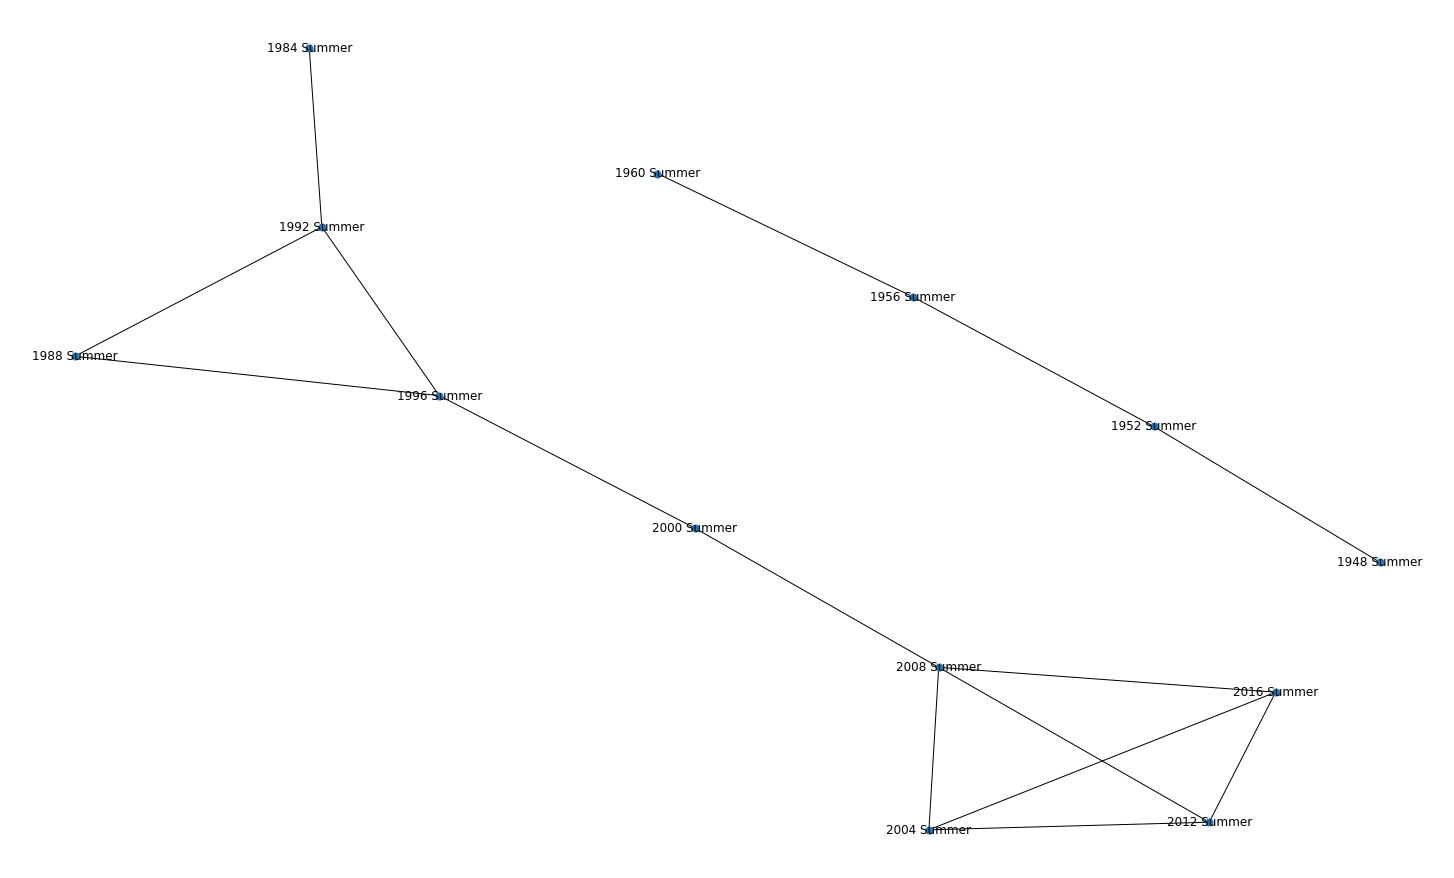

In [17]:
G2 = nx.from_pandas_edgelist(
    bball_bonus, # dataframe
    'Games_x', # source (one node)
    'Games_y', # target (next node)
)

plt.figure(figsize=(20,12)) # adjust my figure to be larger

nx.draw_kamada_kawai(
    G2, # my data from above
    node_size = 50,
    with_labels = True,
)

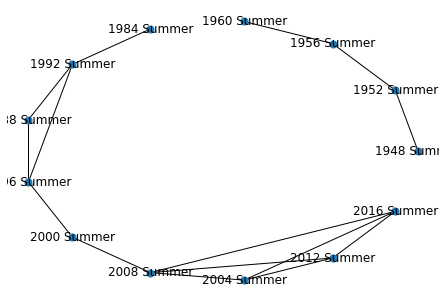

In [18]:
nx.draw_circular(
    G2, # my data from above
    node_size = 50,
    with_labels = True,
)

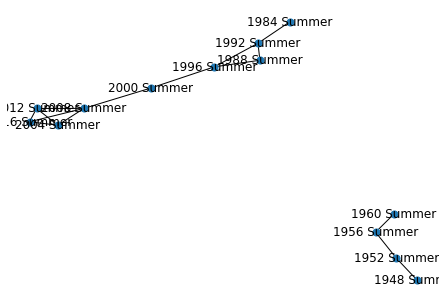

In [19]:
nx.draw(
    G2, # my data from above
    node_size = 50,
    with_labels = True,
)

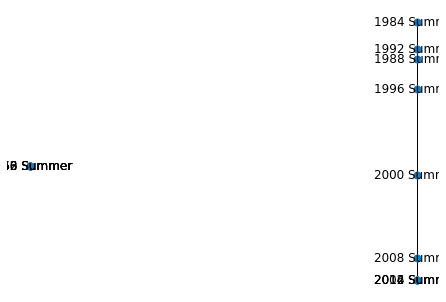

In [38]:
nx.draw_spectral(
    G2, # my data from above
    node_size = 50,
    with_labels = True,
)

## Bonus from DJK
make a matrix of the number of games each player has played,
so columns would be player names, and rows would be player names, and the values would be the counts within


In [36]:
# len(basketball['Name']) == len(basketball) # returns True
basketball_pivot = basketball.pivot_table(
    index = 'Name',
#     columns = 'Name',
    values = 'Games',
    aggfunc = 'count',
)

basketball_pivot # this is just the number of games each player has played, not crossed against "with other players"

,Games
Name,
Adrian Delano Dantley,1
Adrian Howard Smith,1
"Alexander John ""Alex"" Groza",1
Allan Wade Houston,1
Allen Ezail Iverson,1
...,...
"William Lloyd ""Willie"" Anderson, Jr.",1
"William Marion ""Bill"" Hougland",2
William Quinn Buckner,1


# DJK's solution to step 1

In [39]:
DJK = [
    list(df.query(f"Games == '{game}'")['Name'].values) for game in df['Games'].unique()
]

from functools import reduct
from itertools import combinations

combos = pd.DataFrame(
    reduce(
        lambda a, b: a + b),
        [list(combinataions(game, 2)) for game in games],
))

combos.columns = ['source', 'target']

combos.head()

NameError: name 'df' is not defined